In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from pandas.plotting import lag_plot

[*********************100%***********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:      1 Period % Change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3791
Date:                Wed, 18 Feb 2026   Prob (F-statistic):              0.538
Time:                        23:48:43   Log-Likelihood:                 20063.
No. Observations:                3633   AIC:                        -4.012e+04
Df Residuals:                    3631   BIC:                        -4.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.656e-05   2.31e-05     -1.149      0.2

Price,Close,High,Low,Open,Volume,Close + 1,1 Period % Change,Velocity,Acceleration,features,Predictions,residuals,Signal,Strategy_Return,Equity_Curve,Benchmark_Curve
Datetime,,,,,,,,,,,,,,,,
2024-07-05 00:00:00+00:00,1.081783,1.082017,1.081432,1.081432,0,1.081900,0.000108,0.000468,0.000585,0.000526,-0.000021,-0.000129,0,0.000000,1.000000,1.000108
2024-07-05 02:00:00+00:00,1.082134,1.082134,1.081783,1.081783,0,1.082603,0.000433,0.000234,0.000117,0.000176,-0.000025,-0.000458,1,0.000433,1.000433,1.000541
2024-07-05 03:00:00+00:00,1.082603,1.082720,1.082134,1.082134,0,1.082485,-0.000108,0.000469,0.000234,0.000351,-0.000023,0.000085,0,-0.000000,1.000433,1.000433
2024-07-05 07:00:00+00:00,1.083189,1.083306,1.082017,1.082251,0,1.083189,0.000000,0.000821,0.000938,0.000879,-0.000017,-0.000017,0,0.000000,1.000433,1.000433
2024-07-05 12:00:00+00:00,1.083424,1.084363,1.081900,1.082251,0,1.082134,-0.001190,0.001173,0.001758,0.001465,-0.000011,0.001179,0,-0.000000,1.000433,0.999242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-18 05:00:00+00:00,1.184974,1.184974,1.184553,1.184553,0,1.184974,0.000000,0.000421,0.000281,0.000351,-0.000023,-0.000023,0,0.000000,0.960660,0.942967
2026-02-18 09:00:00+00:00,1.183992,1.184133,1.183292,1.183432,0,1.183572,-0.000355,0.000561,0.000981,0.000771,-0.000019,0.000336,0,-0.000000,0.960660,0.942632
2026-02-18 11:00:00+00:00,1.183852,1.184133,1.183432,1.183572,0,1.184413,0.000474,0.000280,0.000701,0.000490,-0.000021,-0.000495,0,0.000000,0.960660,0.943079


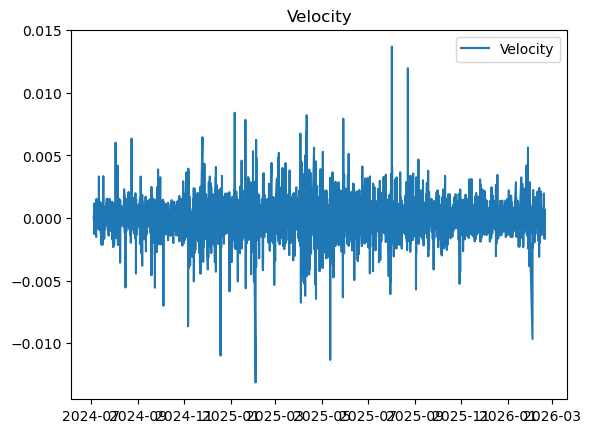

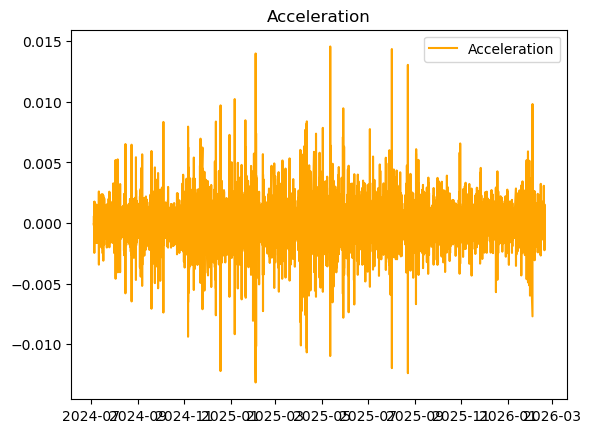

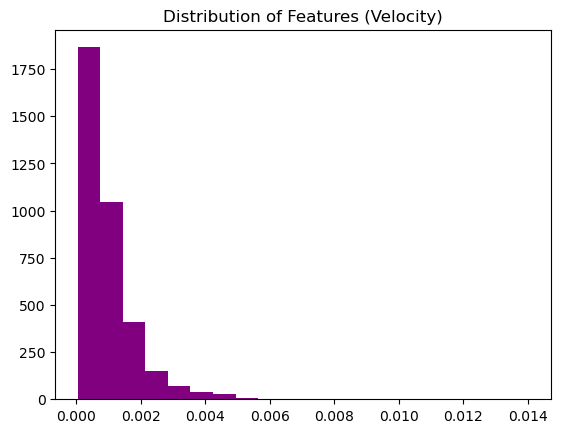

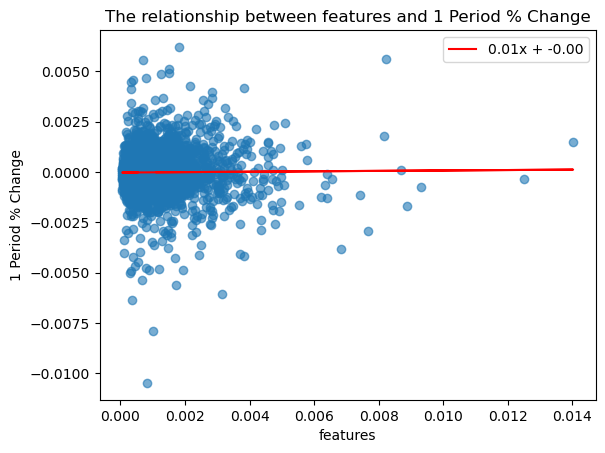

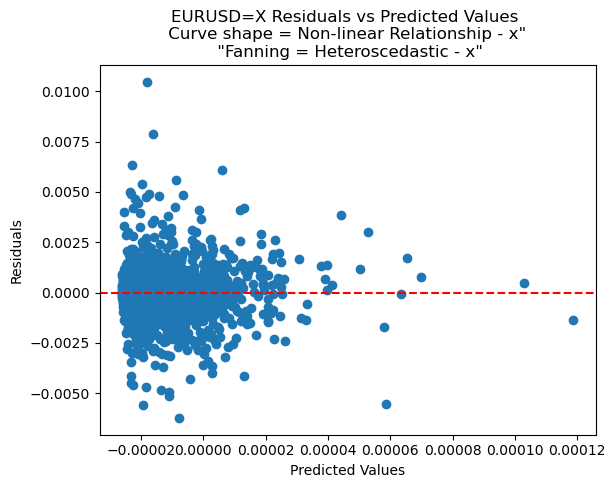

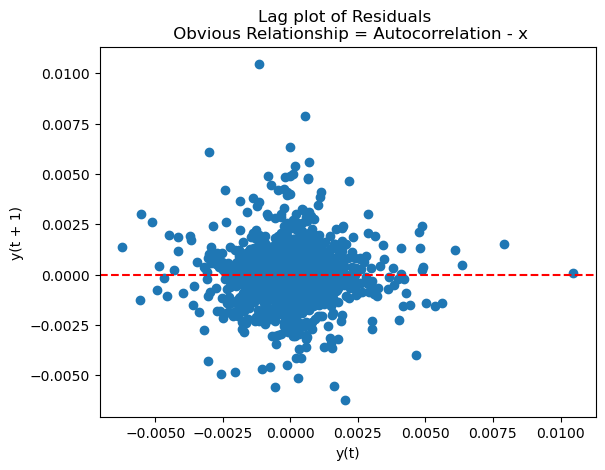

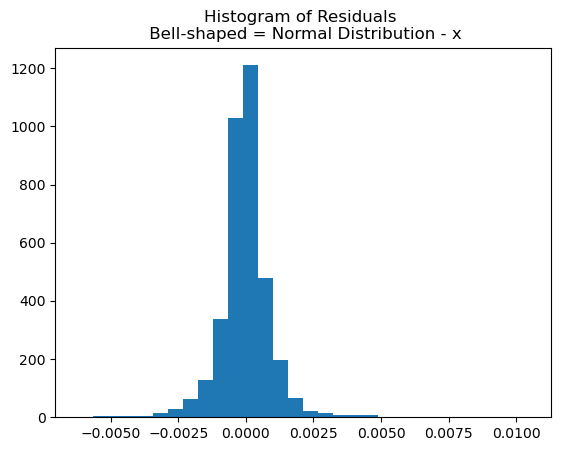

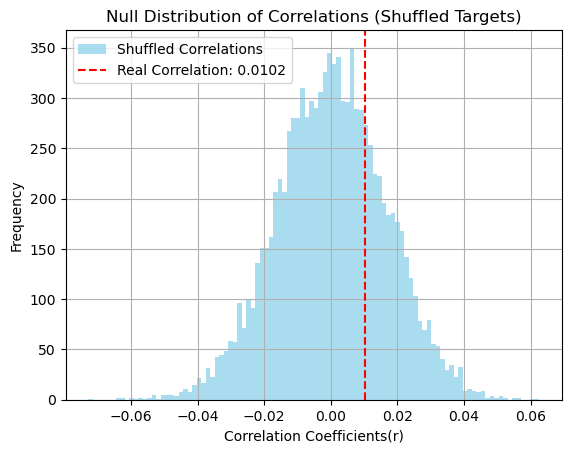

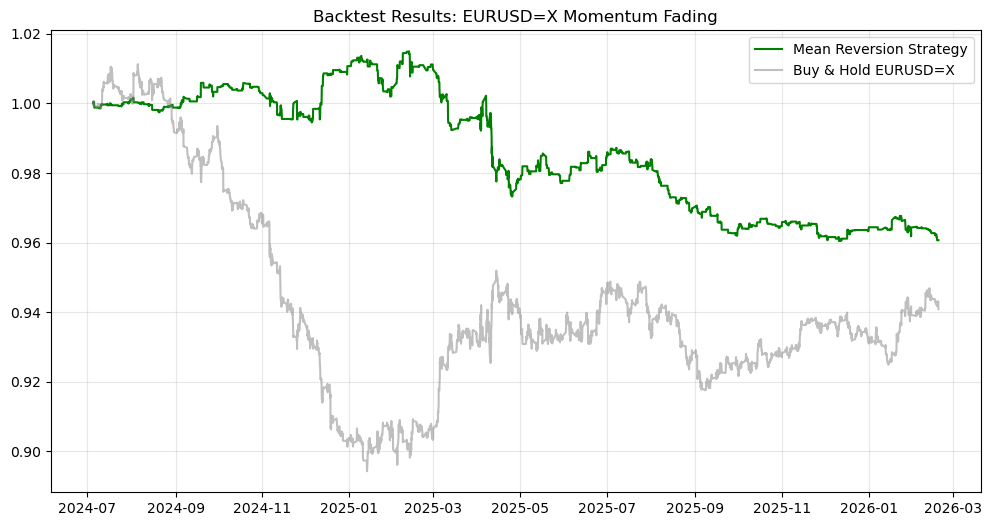

In [5]:
ticker = 'EURUSD=X'
LOOKBACK = -10000
SHIFT = 1
STRATEGY='features'
target = f'{SHIFT} Period % Change'
interval = '1h'

if interval == '1h':
    period = "730d"
else:
    period = "max"

def get_data(interval=interval):
    df = yf.download(ticker, period = period, auto_adjust=True, interval=interval)
    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[LOOKBACK:,:]

def add_target(df, shift=SHIFT):

    df[f'Close + {shift}'] = df['Close'].shift(-shift)

    #what is the change in  close price SHIFT days from now?
    df[f'{SHIFT} Period % Change'] = ((df[f'Close + {shift}'] - df['Close']) / df['Close'])

    #df[f'{SHIFT} Period % Change'] = -1 * df[f'{SHIFT} Period % Change']

    return df

def add_velocity_acceleration(df):
    velocity = df['Close'].diff()
    acceleration = velocity.diff()

    df['Velocity'] = velocity
    df['Acceleration'] = acceleration

    plt.plot(df['Velocity'], label='Velocity')
    plt.legend()
    plt.title('Velocity')
    plt.figure()  
    plt.plot(df['Acceleration'], label='Acceleration', color='orange')
    plt.legend()
    plt.title('Acceleration')   

    return df

def prepare_dataframe_for_regression_feature(df):
    df = df[(df['Velocity'] > 0) & (df['Acceleration'] > 0)].copy() #| (df['Velocity'] < 0) & (df['Acceleration'] < 0)].copy()
    df['features'] = (df['Velocity'] + df['Acceleration']) / 2

    plt.figure()
    plt.hist(df['features'], bins=20, color='purple')
    plt.title("Distribution of Features (Velocity)")
    return df

def generate_regression_output(df, features=STRATEGY, target=target):
    subset = df[[features , target]].dropna()

    # reshape for sklearn 
    x = subset[features] #2d
    y = subset[target]#1d

    X_with_const = sm.add_constant(x)
    model = sm.OLS(y, X_with_const).fit()

    # use the regression model to "predict" the target variable
    y_pred = model.predict(X_with_const)

    #what is the relationhip btw features and target?
    r2 = model.rsquared
    coefficient = model.params[features]
    intercept = model.params['const']
    p_value = model.pvalues[features]
    n_obs = len(subset)

    #coef, intercept, r2..... mse  later on
    print(model.summary())
    print("\n[Regression summary]")
    print(f'Coefficient: {coefficient:.6f}')
    print(f'Intercept: {intercept:.6f}')
    print(f'R2: {r2:.6f}')
    print(f'P-value: {p_value:.6f}')
    print(f'Number of observations: {n_obs}')

    #plot a relationship btw feature and target
    plt.figure()
    plt.scatter(x, y, alpha=0.6)
    plt.plot(x, y_pred, color='red', label=f'{coefficient:.2f}x + {intercept:.2f}')
    plt.xlabel(f'{features}')
    plt.ylabel(f'{target}')
    plt.title(f'The relationship between {features} and {target}')
    plt.legend()

    return df,coefficient, intercept

def validate_regression_output(df, coef, intercept, features=STRATEGY, target=target):
    # y = mx + c
    #info neccessary
    #test_linearity_homoscedasticity
    df['Predictions'] = df[features] * coef + intercept
    df['residuals'] = df['Predictions'] - df[target]

    #plot relationship
    plt.figure()
    plt.scatter(df['Predictions'], df['residuals'])
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{ticker} Residuals vs Predicted Values \n Curve shape = Non-linear Relationship - x" \n "Fanning = Heteroscedastic - x"')

    #test_independence
    plt.figure()
    lag_plot(df['residuals'].dropna())
    plt.title('Lag plot of Residuals \n Obvious Relationship = Autocorrelation - x')
    plt.axhline(0, color='red', linestyle='--')

    #test_normality
    plt.figure()
    plt.hist(df['residuals'].dropna(), bins=30)
    plt.title('Histogram of Residuals \n Bell-shaped = Normal Distribution - x')
    return df

def assess_regression_output(df, coef, features=STRATEGY, target=target, n=10000):
    subset = df[[features, target]].dropna()
    x = subset[features]
    y = subset[target]

    real_r = np.corrcoef(x, y)[0, 1]
    correlation = []

    for _ in range(n):
        shuffled_y = np.random.permutation(y)
        r = np.corrcoef(x, shuffled_y)[0, 1]
        correlation.append(r)

    plt.figure()
    plt.hist(correlation, bins=100, alpha=0.7, color='skyblue', label='Shuffled Correlations')
    plt.axvline(real_r, color='red', linestyle='--', label=f'Real Correlation: {real_r:.4f}')
    plt.xlabel('Correlation Coefficients(r)')
    plt.ylabel('Frequency')
    plt.title(f'Null Distribution of Correlations (Shuffled Targets)')
    plt.legend()
    plt.grid(True)

    return df

def run_backtest(df, strategy_col='Velocity', threshold_pct=0.10):
    # 1. Calculate Thresholds (Top and Bottom 10%)
    upper_threshold = df[strategy_col].quantile(1 - threshold_pct)
    lower_threshold = df[strategy_col].quantile(threshold_pct)
    
    # 2. Generate Trading Signals
    # If Velocity is extremely high -> Sell (-1)
    # If Velocity is extremely low -> Buy (+1)
    # Otherwise -> Stay out (0)
    df['Signal'] = 0
    df.loc[df[strategy_col] > upper_threshold, 'Signal'] = -1
    df.loc[df[strategy_col] < lower_threshold, 'Signal'] = 1
    
    # 3. Calculate Returns
    # We multiply our signal by 'Tomorrow's Return'
    # Use the Target column we created earlier (e.g., '1 Period % Change')
    target_col = f'{SHIFT} Period % Change'
    df['Strategy_Return'] = df['Signal'] * df[target_col]
    
    # 4. Calculate Cumulative Performance
    # We use (1 + r).cumprod() to see the growth of $1
    df['Equity_Curve'] = (1 + df['Strategy_Return'].fillna(0)).cumprod()
    df['Benchmark_Curve'] = (1 + df[target_col].fillna(0)).cumprod()
    
    # 5. Plot Performance
    plt.figure(figsize=(12, 6))
    plt.plot(df['Equity_Curve'], label='Mean Reversion Strategy', color='green')
    plt.plot(df['Benchmark_Curve'], label=f'Buy & Hold {ticker}', color='gray', alpha=0.5)
    plt.title(f'Backtest Results: {ticker} Momentum Fading')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Calculate Total Return
    total_ret = (df['Equity_Curve'].iloc[-1] - 1) * 100
    print(f"Total Strategy Return: {total_ret:.2f}%")
    
    return df

# Run it in your main pipeline
# df_results = run_backtest(df_result)

def main():
    df = get_data(interval=interval)
    df = add_target(df, shift=SHIFT)
    df = add_velocity_acceleration(df)
    df = prepare_dataframe_for_regression_feature(df)
    df, coef, intercept = generate_regression_output(df, features=STRATEGY, target=target)
    df = validate_regression_output(df, coef=coef, intercept=intercept, features=STRATEGY, target=target)
    df = assess_regression_output(df, coef=coef)   
    df = run_backtest(df, strategy_col=STRATEGY, threshold_pct=0.10) 

    return df

df = main()
df